In [1]:
cd /home/sumin/Downloads

/home/sumin/Downloads


In [2]:
import numpy as np 
import pandas as pd 

df = pd.read_csv('/home/sumin/Downloads/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.shape

(45211, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#중복 데이터 확인
df.duplicated().sum()

0

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

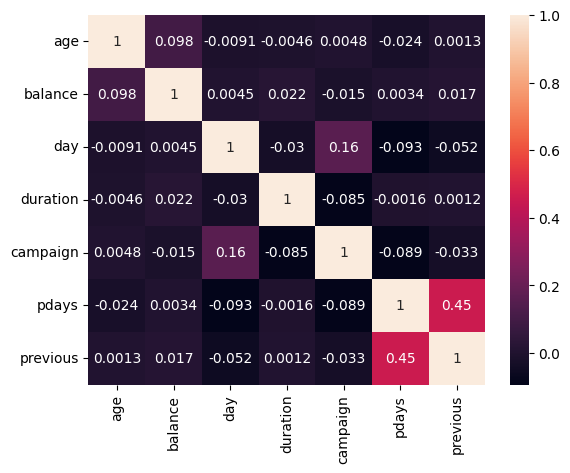

In [8]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(data = df_corr, annot = True, cbar = True)

In [9]:
df.head(45000)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,25,admin.,single,tertiary,no,2916,no,no,cellular,12,oct,143,1,-1,0,unknown,no
44996,75,retired,divorced,secondary,no,1092,no,no,telephone,12,oct,250,1,431,2,failure,no
44997,33,self-employed,single,tertiary,no,658,yes,no,cellular,12,oct,146,2,183,3,failure,no
44998,33,management,single,tertiary,no,131,yes,no,cellular,12,oct,209,3,427,2,failure,yes


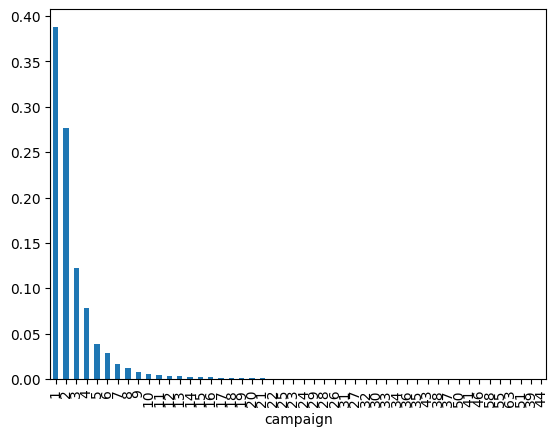

In [10]:
df.campaign.value_counts(normalize = True).plot.bar()
plt.show()

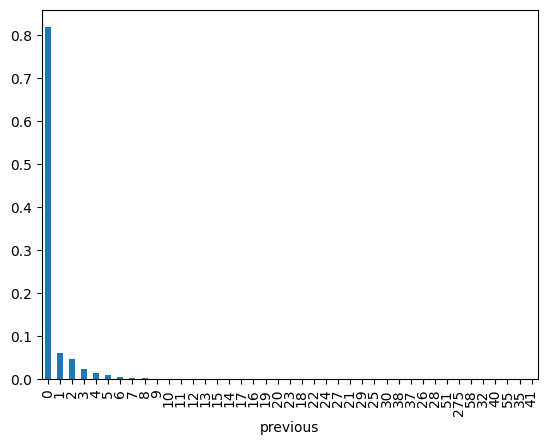

In [11]:
df.previous.value_counts(normalize = True).plot.bar()
plt.show()

In [12]:
df.groupby('previous').size()

previous
0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
14        19
15        20
16        13
17        15
18         6
19        11
20         8
21         4
22         6
23         8
24         5
25         4
26         2
27         5
28         2
29         4
30         3
32         1
35         1
37         2
38         2
40         1
41         1
51         1
55         1
58         1
275        1
dtype: int64

In [13]:
df.groupby('pdays').size()

pdays
-1      36954
 1         15
 2         37
 3          1
 4          2
        ...  
 838        1
 842        1
 850        1
 854        1
 871        1
Length: 559, dtype: int64

In [8]:
df.groupby('default').size()

default
no     44396
yes      815
dtype: int64

In [5]:
#의미있는 data 추출
df=df.drop(columns=["default", "pdays", "previous", "y"],axis=1)
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,unknown
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,unknown
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,unknown
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,unknown
4,33,unknown,single,unknown,1,no,no,unknown,5,may,198,1,unknown


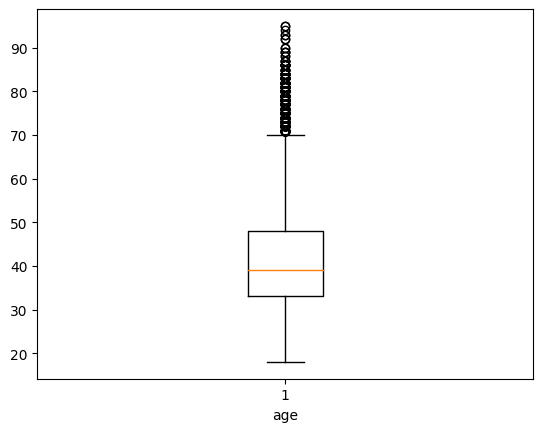

In [10]:
#outlier
plt.boxplot(df['age'])
plt.xlabel('age')
plt.show()

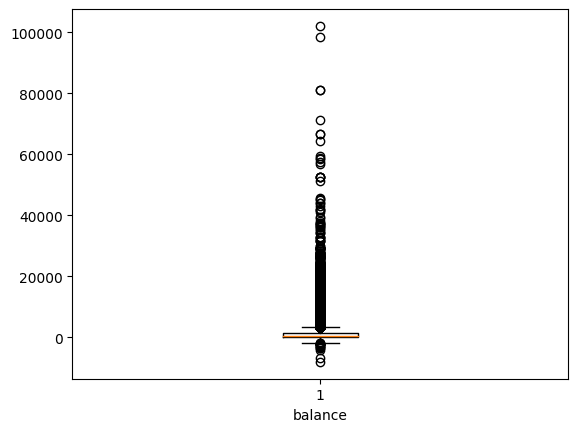

In [11]:
plt.boxplot(df['balance'])
plt.xlabel('balance')
plt.show()

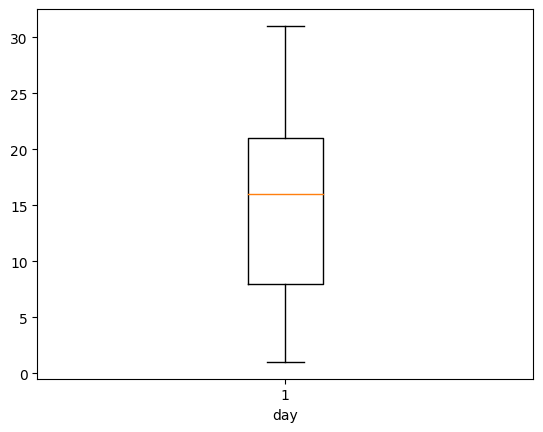

In [18]:
plt.boxplot(df['day'])
plt.xlabel('day')
plt.show()

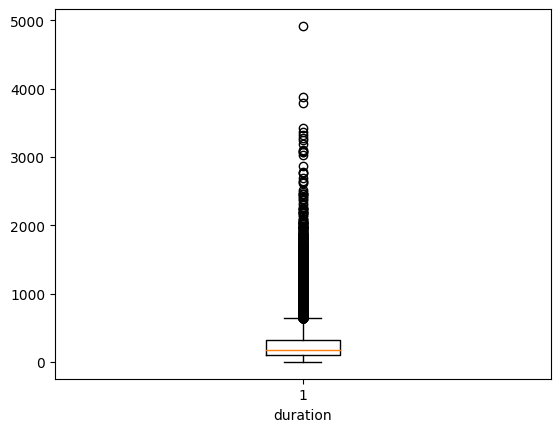

In [19]:
plt.boxplot(df['duration'])
plt.xlabel('duration')
plt.show()

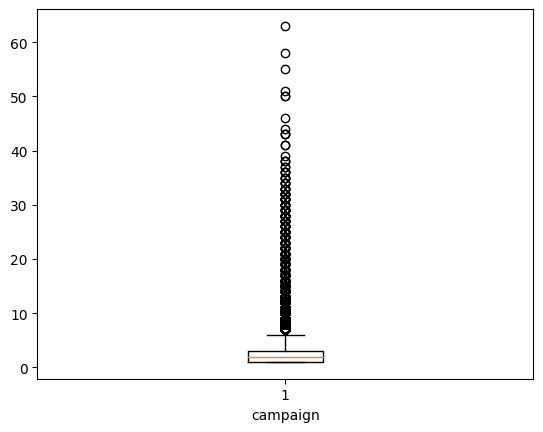

In [20]:
plt.boxplot(df['campaign'])
plt.xlabel('campaign')
plt.show()

In [6]:
# Remove outliers
df = df[(df['age'] < 70)]
df = df[(df['balance'] < 4100) & (df['balance'] > -2000)]
df = df[(df['duration'] < 2500)]
df = df[(df['campaign'] < 40)]
df.shape

(40944, 13)

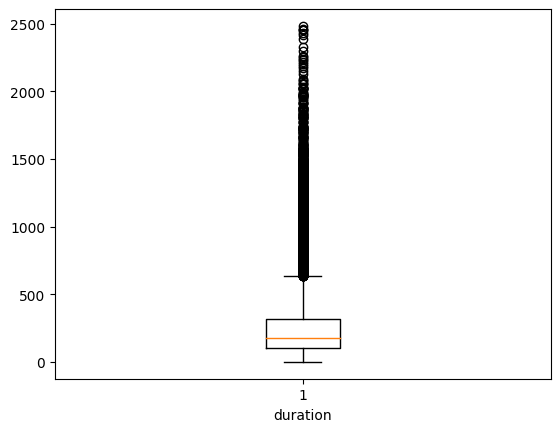

In [15]:
plt.boxplot(df['duration'])
plt.xlabel('duration')
plt.show()

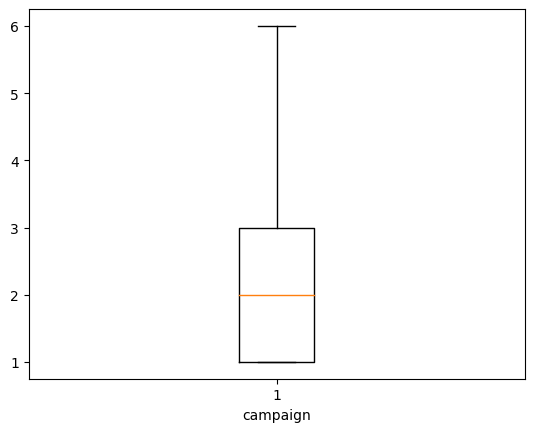

In [10]:
plt.boxplot(df['campaign'])
plt.xlabel('campaign')
plt.show()

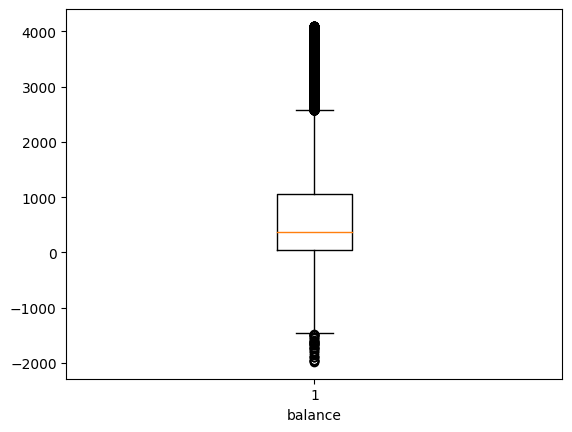

In [19]:
plt.boxplot(df['balance'])
plt.xlabel('balance')
plt.show()

In [22]:
#Label encoding
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#df_e = df.apply(le.fit_transform)
#df_e.head()

In [7]:
#Label encoding
label_encoding = {
    "job":{"management":0,"technician":1,"entrepreneur":2,"blue-collar":3,"unknown":4,"retired":5,"admin.":6,"services":7,"self-employed":8,
           "unemployed":9,"housemaid":10,"student":11},
    "marital":{"married":0,"single":1,"divorced":2},
    "education":{"tertiary":0,"secondary":1,"unknown":2,"primary":3},
    "housing":{"no":0,"yes":1},
    "loan":{"no":0,"yes":1},
    "contact":{"unknown":0,"cellular":1,"telephone":2},
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "poutcome":{"unknown":0,"failure":1,"other":2,"success":3}          
}

df_e = df.replace(label_encoding)
df_e.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,58,0,0,0,2143,1,0,0,5,4,261,1,0
1,44,1,1,1,29,1,0,0,5,4,151,1,0
2,33,2,0,1,2,1,1,0,5,4,76,1,0
3,47,3,0,2,1506,1,0,0,5,4,92,1,0
4,33,4,1,2,1,0,0,0,5,4,198,1,0


In [8]:
from sklearn.preprocessing import MinMaxScaler

df_s = MinMaxScaler().fit_transform(df_e)
df_m = pd.DataFrame(df_s, index=df_e.index, columns=df_e.columns)
df_m.head(10)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,0.784314,0.000000,0.0,0.000000,0.678237,1.0,0.0,0.0,0.133333,0.363636,0.105030,0.0,0.0
1,0.509804,0.090909,0.5,0.333333,0.330482,1.0,0.0,0.0,0.133333,0.363636,0.060765,0.0,0.0
2,0.294118,0.181818,0.0,0.333333,0.326040,1.0,1.0,0.0,0.133333,0.363636,0.030584,0.0,0.0
3,0.568627,0.272727,0.0,0.666667,0.573450,1.0,0.0,0.0,0.133333,0.363636,0.037022,0.0,0.0
4,0.294118,0.363636,0.5,0.666667,0.325876,0.0,0.0,0.0,0.133333,0.363636,0.079678,0.0,0.0
5,0.333333,0.000000,0.0,0.000000,0.363711,1.0,0.0,0.0,0.133333,0.363636,0.055936,0.0,0.0
6,0.196078,0.000000,0.5,0.000000,0.399243,1.0,1.0,0.0,0.133333,0.363636,0.087324,0.0,0.0
7,0.470588,0.181818,1.0,0.000000,0.326040,1.0,0.0,0.0,0.133333,0.363636,0.152918,0.0,0.0
8,0.784314,0.454545,0.0,1.000000,0.345616,1.0,0.0,0.0,0.133333,0.363636,0.020121,0.0,0.0
9,0.490196,0.090909,0.5,0.333333,0.423260,1.0,0.0,0.0,0.133333,0.363636,0.022133,0.0,0.0


In [39]:
#standard
from sklearn.preprocessing import StandardScaler

df_s = StandardScaler().fit_transform(df_e)
df_ms = pd.DataFrame(df_s, index=df_e.index, columns=df_e.columns)
df_ms.head(10)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,poutcome
0,1.793380,-1.142360,-0.747854,-1.096462,1.512061,0.870853,-0.451493,-1.400699,-1.289056,-0.455832,0.026277,-0.58355,-0.409457
1,0.374343,-0.819412,0.694247,-0.054075,-0.710114,0.870853,-0.451493,-1.400699,-1.289056,-0.455832,-0.418621,-0.58355,-0.409457
2,-0.740614,-0.496465,-0.747854,-0.054075,-0.738496,0.870853,2.214874,-1.400699,-1.289056,-0.455832,-0.721960,-0.58355,-0.409457
3,0.678423,-0.173518,-0.747854,0.988313,0.842465,0.870853,-0.451493,-1.400699,-1.289056,-0.455832,-0.657248,-0.58355,-0.409457
4,-0.740614,0.149429,0.694247,0.988313,-0.739547,-1.148299,-0.451493,-1.400699,-1.289056,-0.455832,-0.228528,-0.58355,-0.409457
5,-0.537894,-1.142360,-0.747854,-1.096462,-0.497778,0.870853,-0.451493,-1.400699,-1.289056,-0.455832,-0.467155,-0.58355,-0.409457
6,-1.247413,-1.142360,0.694247,-1.096462,-0.270725,0.870853,2.214874,-1.400699,-1.289056,-0.455832,-0.151682,-0.58355,-0.409457
7,0.171624,-0.496465,2.136349,-1.096462,-0.738496,0.870853,-0.451493,-1.400699,-1.289056,-0.455832,0.507576,-0.58355,-0.409457
8,1.793380,0.472377,-0.747854,2.030701,-0.613406,0.870853,-0.451493,-1.400699,-1.289056,-0.455832,-0.827118,-0.58355,-0.409457
9,0.272984,-0.819412,0.694247,-0.054075,-0.117254,0.870853,-0.451493,-1.400699,-1.289056,-0.455832,-0.806895,-0.58355,-0.409457


<Axes: >

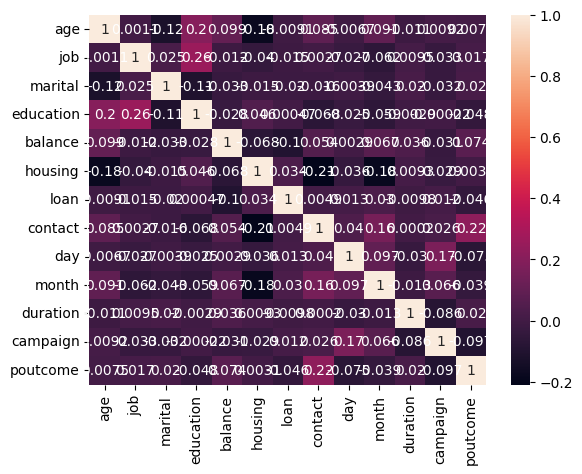

In [25]:
df_corr = df_m.corr(numeric_only=True)
sns.heatmap(data = df_corr, annot = True, cbar = True)

[0.93663271 0.0631675 ]


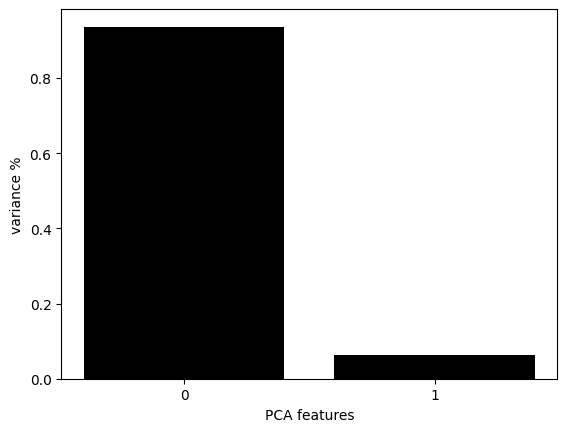

In [48]:
#pca
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
data = pca.fit_transform(df_m)

In [49]:
data.shape

(40944, 2)

In [50]:
df_pca = pd.DataFrame(data = data, columns = ["pca1", "pca2"])
df_pca

,pca1,pca2
0,1438.459253,-8.410926
1,-676.578730,-96.488130
2,-704.364253,-171.193282
3,799.732589,-170.790557
4,-704.100166,-49.189435
...,...,...
40939,-591.409394,17.642973
40940,-198.185112,133.570820
40941,127.944457,721.195719
40942,-33.901501,253.841477


/home/sumin/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sumin/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sumin/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sumin/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/sumin/.local/lib/python3.8/site-pa

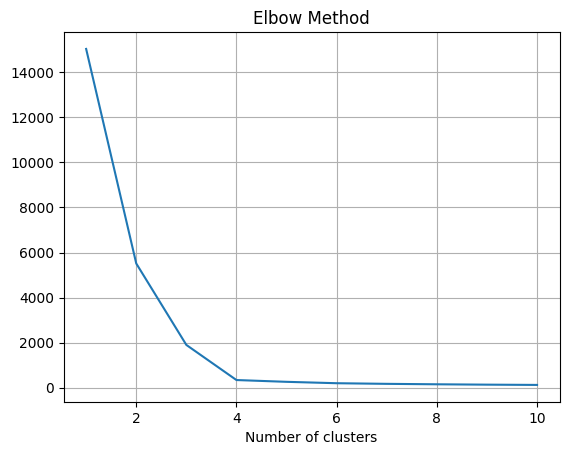

In [16]:
#kmeans
from sklearn.cluster import KMeans

distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)
    distortions.append(kmeans.inertia_)
    
plt.plot(range(1, 11), distortions)
plt.title('Elbow Method')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.show()

In [51]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

df_f = df_pca.copy(deep=True)
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300).fit(df_f)
df_f['cluster'] = kmeans.labels_

df_f['silhouette_coeff'] = silhouette_samples(data, df_f['cluster'])
average_score = silhouette_score(data, df_f['cluster'])
print(average_score)

df_f.head()

/home/sumin/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.45727979861093015


,pca1,pca2,cluster,silhouette_coeff
0,1438.459253,-8.410926,0,0.501441
1,-676.578730,-96.488130,1,0.661824
2,-704.364253,-171.193282,1,0.640282
3,799.732589,-170.790557,0,0.487840
4,-704.100166,-49.189435,1,0.666067


In [52]:
df_f.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417073
1    0.505228
2    0.369357
3    0.519343
Name: silhouette_coeff, dtype: float64

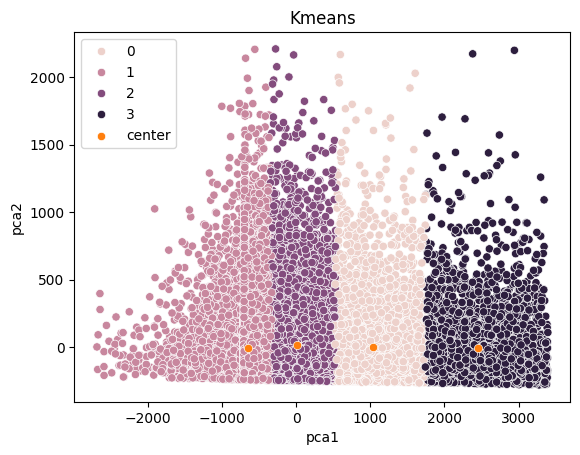

In [53]:
sns.scatterplot(x = df_f['pca1'], y = df_f['pca2'], hue = df_f['cluster'])
sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], label = 'center')
plt.title("Kmeans")
plt.show()

In [46]:
#meanshift
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

df_ms = df_pca.copy(deep=True)
bw = estimate_bandwidth(df_ms)
meanshift = MeanShift(bandwidth = bw).fit(df_ms)
df_ms['cluster'] = meanshift.labels_
df_ms['silhouette_coeff'] = silhouette_samples(data, df_ms['cluster'])
average_score = silhouette_score(data, df_ms['cluster'])
print(average_score)

df_ms.head()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [16]:
df_ms.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.880020
1    0.881155
2    0.882340
3    0.880395
Name: silhouette_coeff, dtype: float64

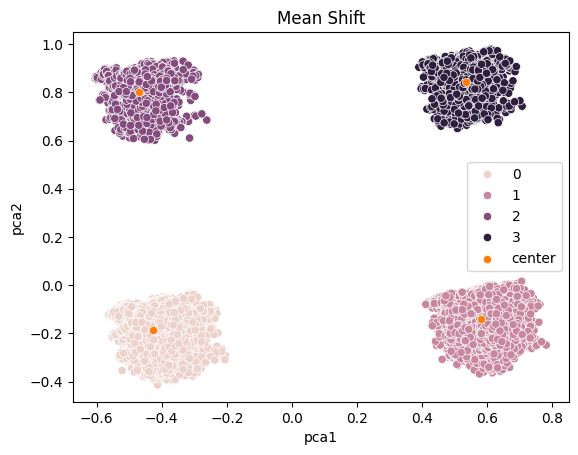

In [17]:
sns.scatterplot(x = df_ms['pca1'], y = df_ms['pca2'], hue = df_ms['cluster'])
sns.scatterplot(x = meanshift.cluster_centers_[:,0], y = meanshift.cluster_centers_[:,1], label = 'center')
plt.title("Mean Shift")
plt.show()

/home/sumin/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


0.6921006554945336


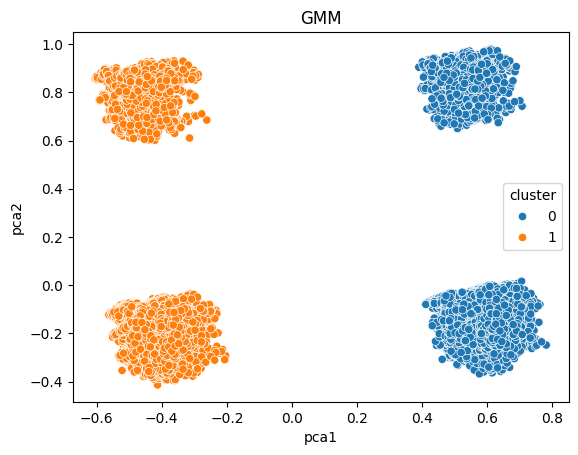

/home/sumin/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


0.8120505993763899


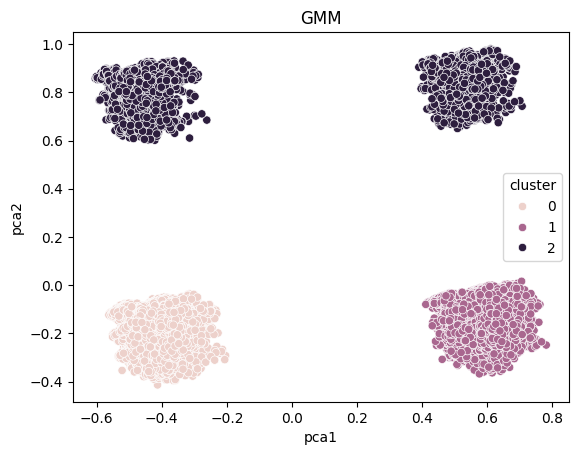

/home/sumin/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


0.8806942792796927


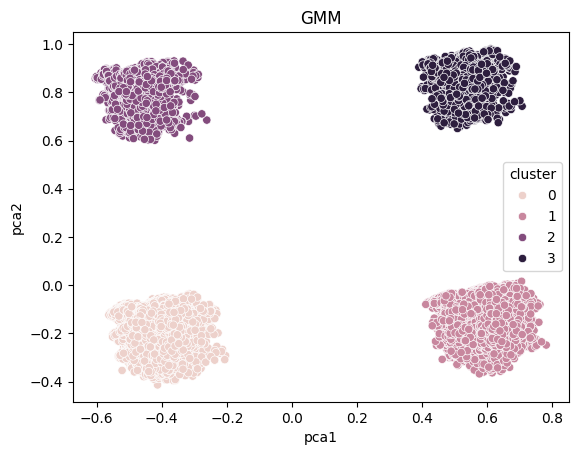

/home/sumin/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


0.6711332280192427


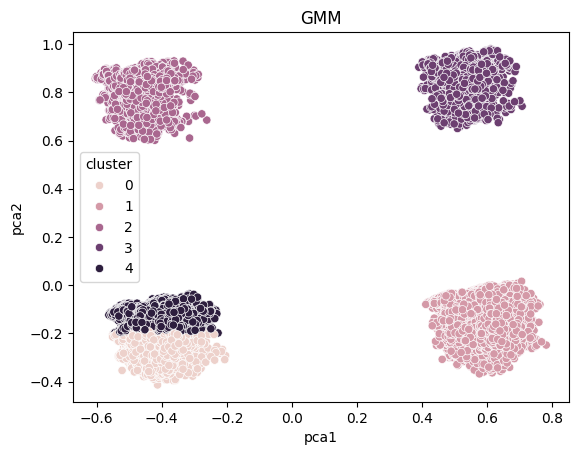

In [33]:
#gmm
from sklearn.mixture import GaussianMixture

n = [2, 3, 4, 5]
for i in n:
    df_g = df_pca.copy(deep=True)
    gmm = GaussianMixture(n_components = i).fit(df_g)
    gmm_labels = gmm.predict(data)
    df_g['cluster'] = gmm_labels
    df_g['silhouette_coeff'] = silhouette_samples(data, df_g['cluster'])
    average_score = silhouette_score(data, df_g['cluster'])
    print(average_score)
    sns.scatterplot(x = df_g['pca1'], y = df_g['pca2'], hue = df_g['cluster'])
    plt.title("GMM")
    plt.show()